# Importing Packages

Let's first import all the necessary libraries. I'll use `numpy` and `pandas` to start with. For visualization, I will use `pyplot` subpackage of `matplotlib` and `seaborn`. For implementing Machine Learning models and processing of data, I will use the `sklearn` library. For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the `train_test_split` method. To scale the features, I am using `StandardScaler`. 

In [462]:
import warnings
warnings.filterwarnings(action = 'ignore')

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. I'll use the pandas `read_csv` method to read the dataset.

In [463]:
# # Get file name from current working directory:
# import os
# files_in_cwd = os.listdir()
# print(files_in_cwd)

data = pd.read_csv("Heart-Disease.csv")

# Making Copy for the baseline data
base_df = data.copy()

# EDA

In [464]:
display(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [465]:
print(f"Data set has {data.shape[0]} records and {data.shape[1]-1} features.")

Data set has 1025 records and 13 features.


Looks like the dataset has a total of `1025 records` and `13 features` along with one target value which we wish to find.

In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [467]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


#### Checking for NULL values

In [468]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Remark:** No missing values found!!

#### Checking for Duplicate values

In [469]:
data.duplicated().sum()

723

In [470]:
data[data.duplicated()].sort_values(by='trestbps')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
704,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
808,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
732,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1
223,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
558,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [471]:
data.drop_duplicates(inplace=True)

**Remark:** Opps so many duplicates! I will drop them.

#### Checking for Outliers

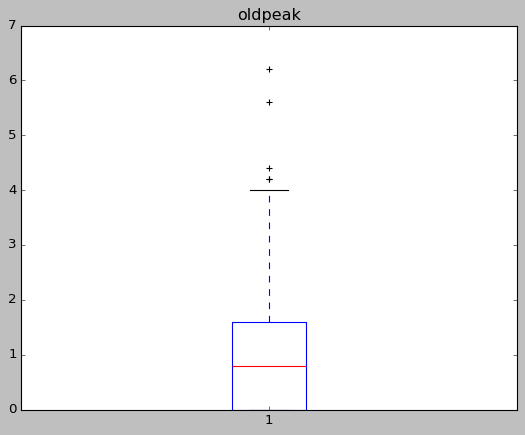

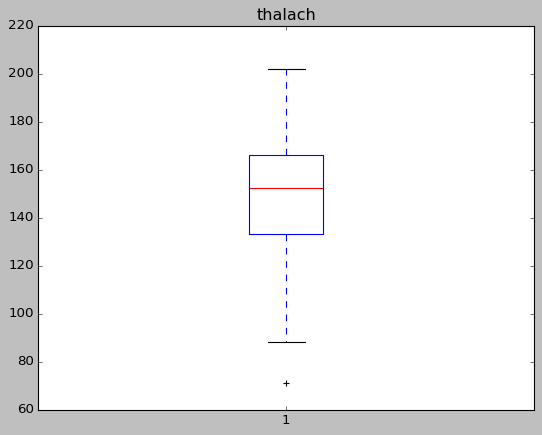

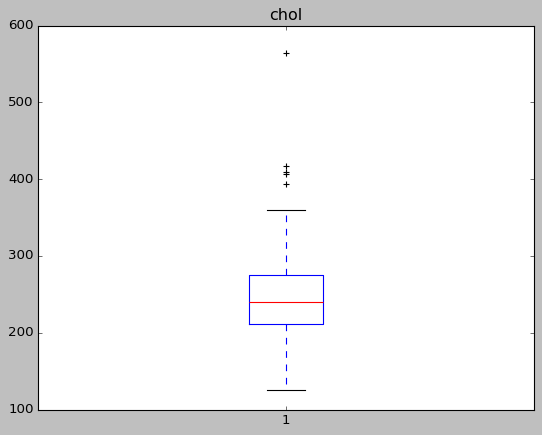

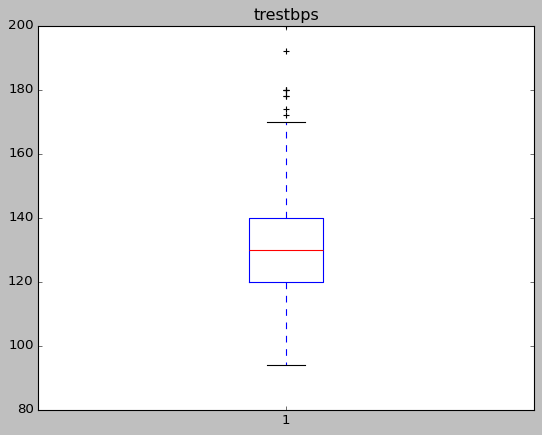

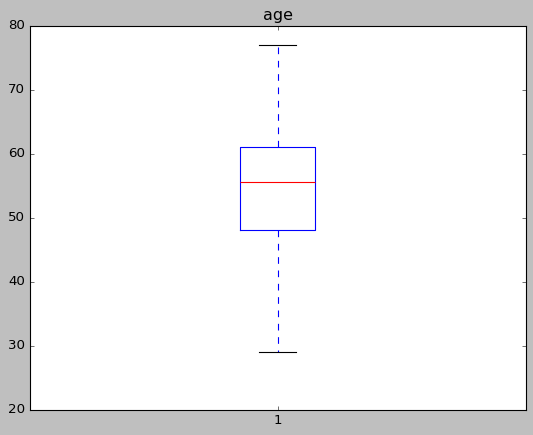

In [472]:
columns = ["oldpeak", "thalach", "chol", "trestbps", "age"]

for col in columns:
    plt.style.use('classic')
    plt.boxplot(data[col])
    plt.title(col)
    plt.show()

In [473]:
columns = ["oldpeak", "thalach", "chol", "trestbps", "age"]

def percentage_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[column] < Q1 - 1.5 * IQR) | (data[column] > Q3 + 1.5 * IQR)]
    percentage = len(outliers) / len(data) * 100
    return percentage

for col in columns:
    print(f"Percentage of outliers in {col}: {percentage_outliers(col):.2f}%")

Percentage of outliers in oldpeak: 1.66%
Percentage of outliers in thalach: 0.33%
Percentage of outliers in chol: 1.66%
Percentage of outliers in trestbps: 2.98%
Percentage of outliers in age: 0.00%


**Analysis of Outliers:** As percentage outliers are very low, I will skip outlier removal.

### Categorical Variables
- sex
- cp
- restecg
- exang
- slope
- ca
- thal
- target

To Study the distribution of categorical variables: `Count plot`

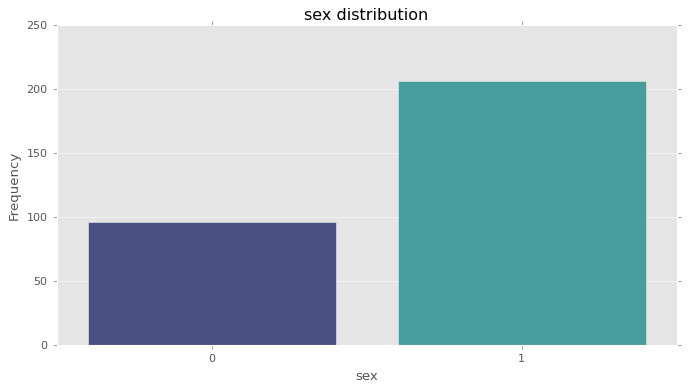

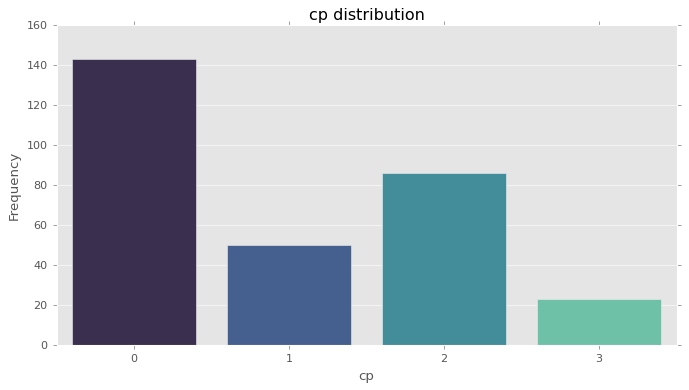

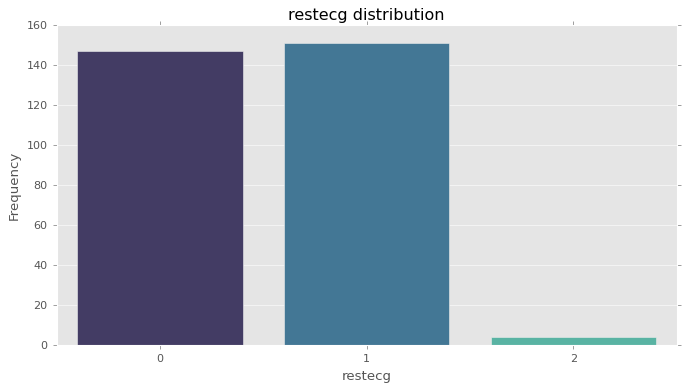

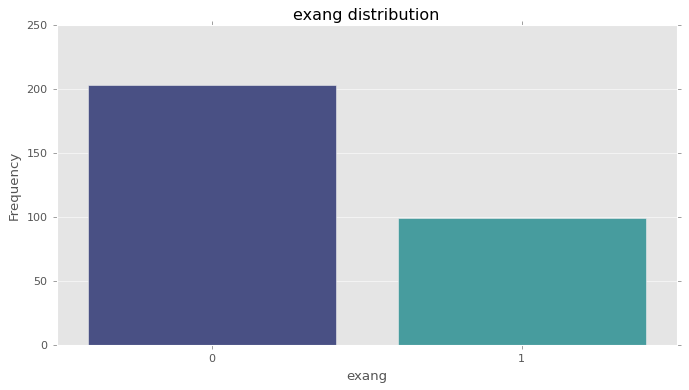

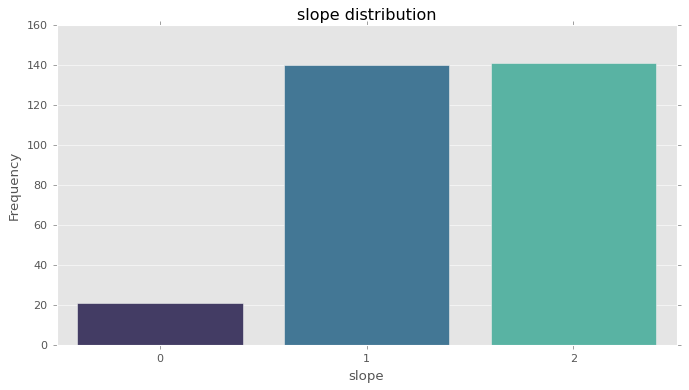

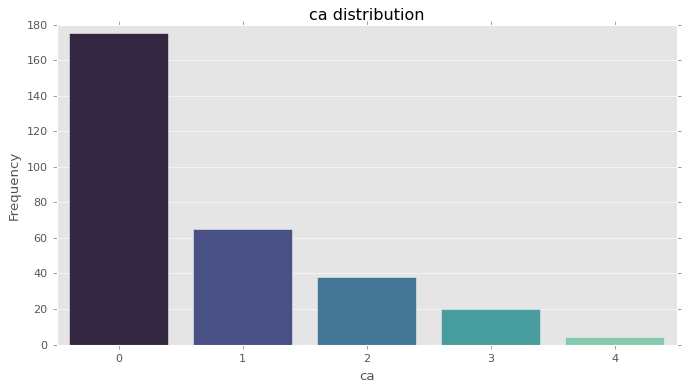

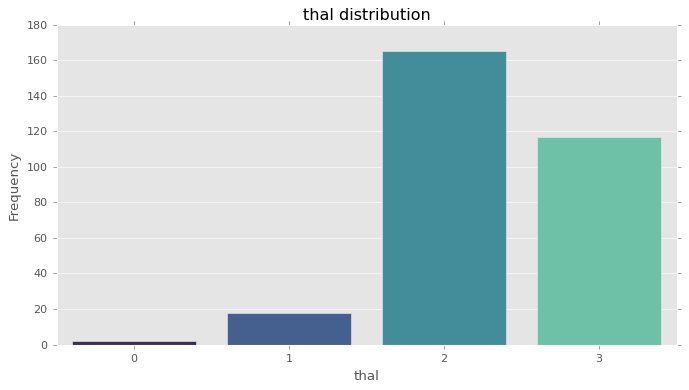

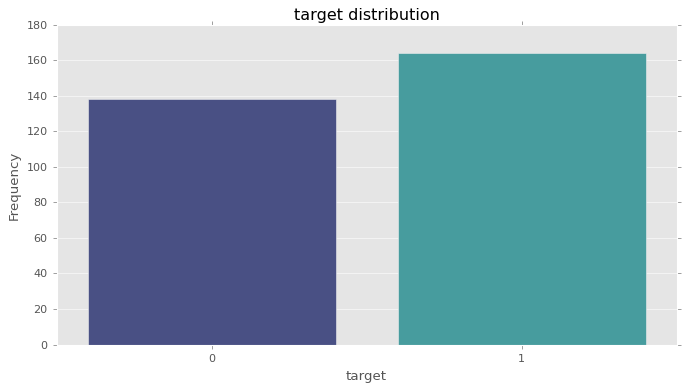

In [474]:
def bar_plot(column):
    plt.style.use('ggplot')
    plt.figure(figsize = (10,5))
    sns.countplot(data=data, x=column, palette='mako').set(xlabel=column, ylabel="Frequency", title=f"{column} distribution")
    plt.show()

category = ["sex", "cp", "restecg", "exang", "slope", "ca", "thal", "target"]
for c in category:
    bar_plot(c)

To Study Disease Probability for different categorical variables: `Box plot`

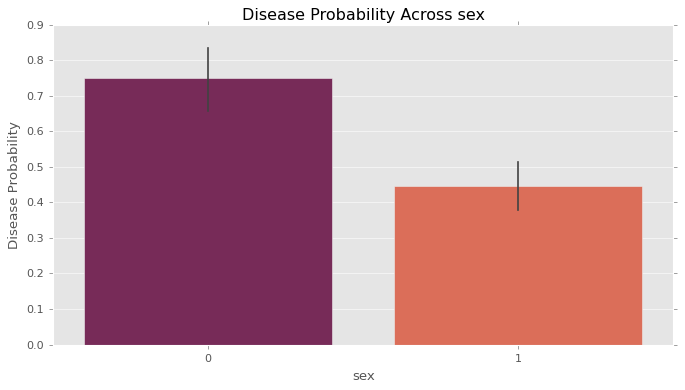

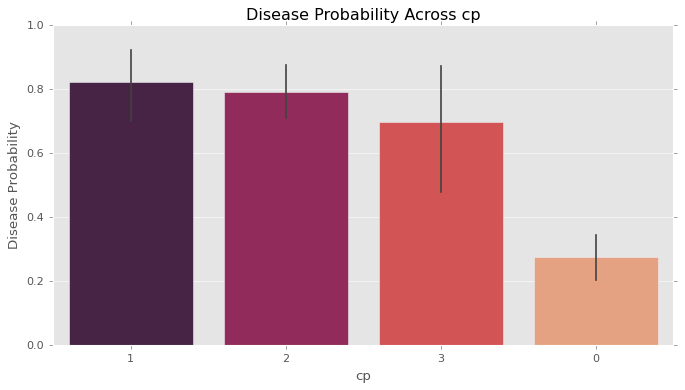

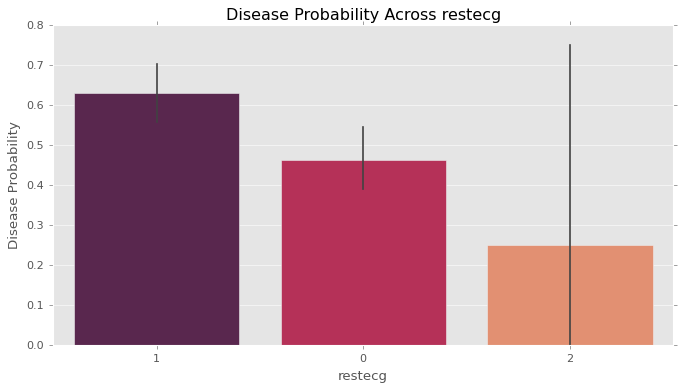

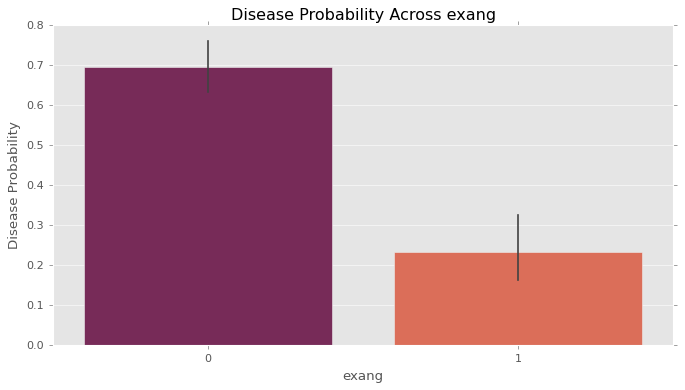

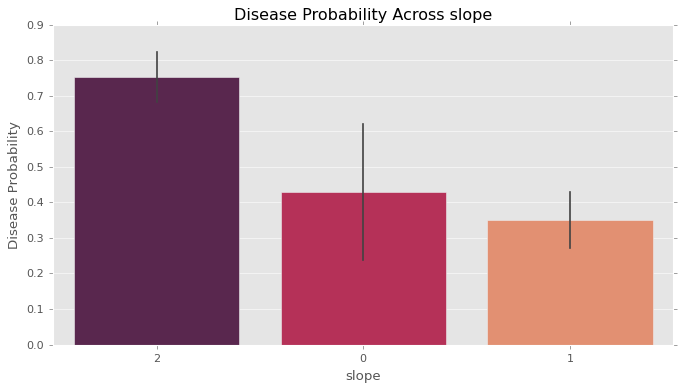

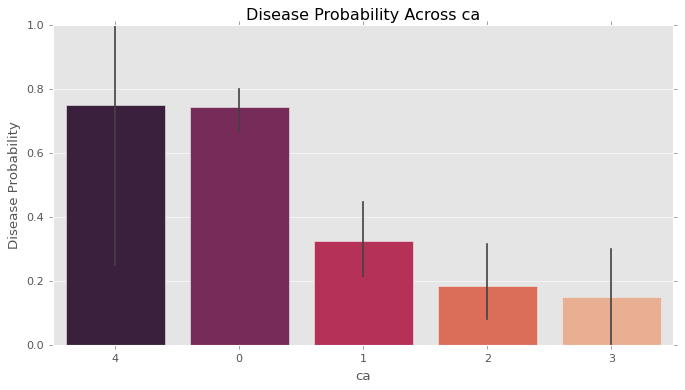

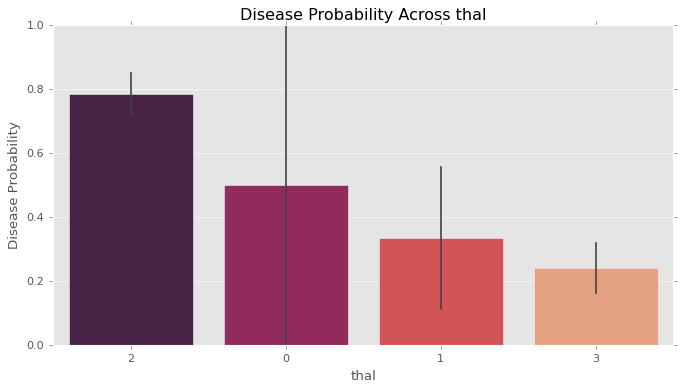

In [475]:
def bar_plot(column):
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 5))
    order = data.groupby(column)['target'].mean().sort_values(ascending=False).index
    sns.barplot(data=data, x=column, y='target', palette='rocket', order=order).set(xlabel=column, ylabel="Disease Probability", title=f"Disease Probability Across {column}")
    plt.show()

category = ["sex", "cp", "restecg", "exang", "slope", "ca", "thal"]
for c in category:
    bar_plot(c)


**Inferences**
1. Women are more likely to have heart disease
2. Patiens who have chest pain, have a very higher probability of a heart disease
3. exang = 0 patients have a higher risk than exang = 1
4. slope = 2 patients have a higher risk then slope = 0 or 1
5. ca = 0 or 4 patients have a higher risk then ca = 1, 2 or 3
6. Patients whose thal = 2 have a very high heart disease probability

### Numerical Variables
- age
- trestbps
- chol
- fbs
- thalach
- oldpeak

To Study the distribution of continuous variables: `Histogram`

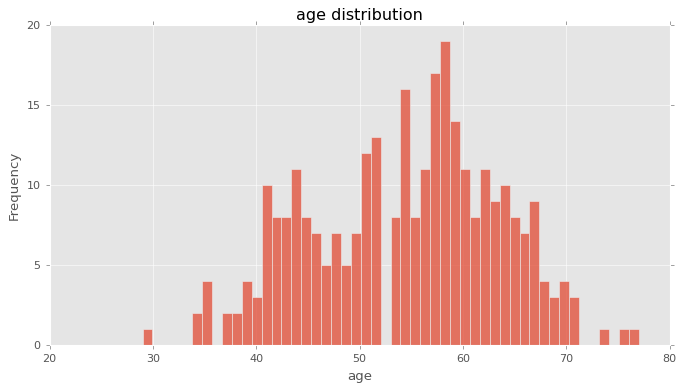

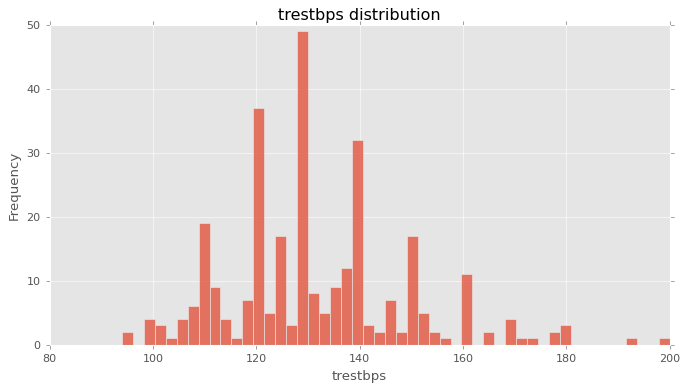

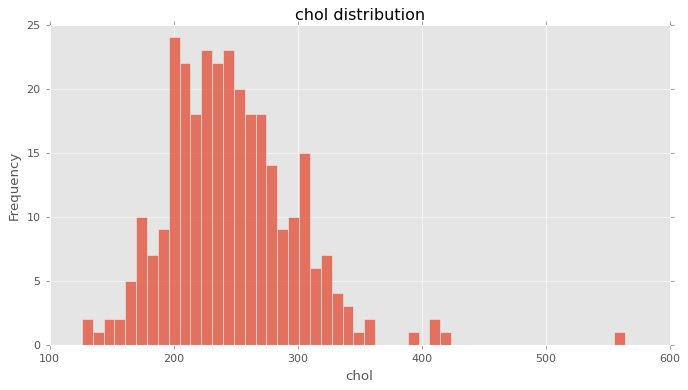

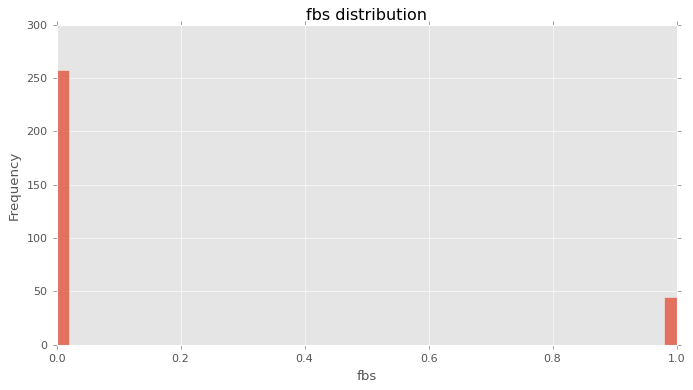

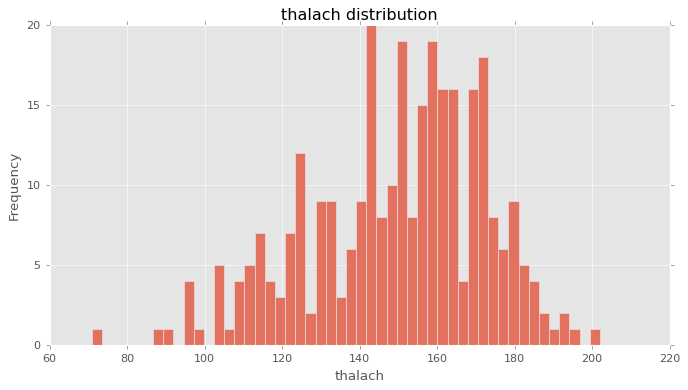

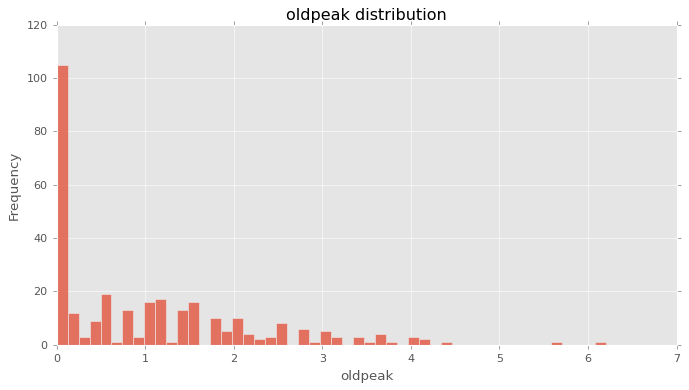

In [476]:
def plot_hist(column):
    plt.style.use('ggplot')
    plt.figure(figsize = (10, 5))
    sns.histplot(data[column], bins=50).set(xlabel=column, ylabel="Frequency", title=f"{column} distribution")
    plt.show()

num = ["age", "trestbps", "chol", "fbs", "thalach", "oldpeak"]
for n in num:
    plot_hist(n)

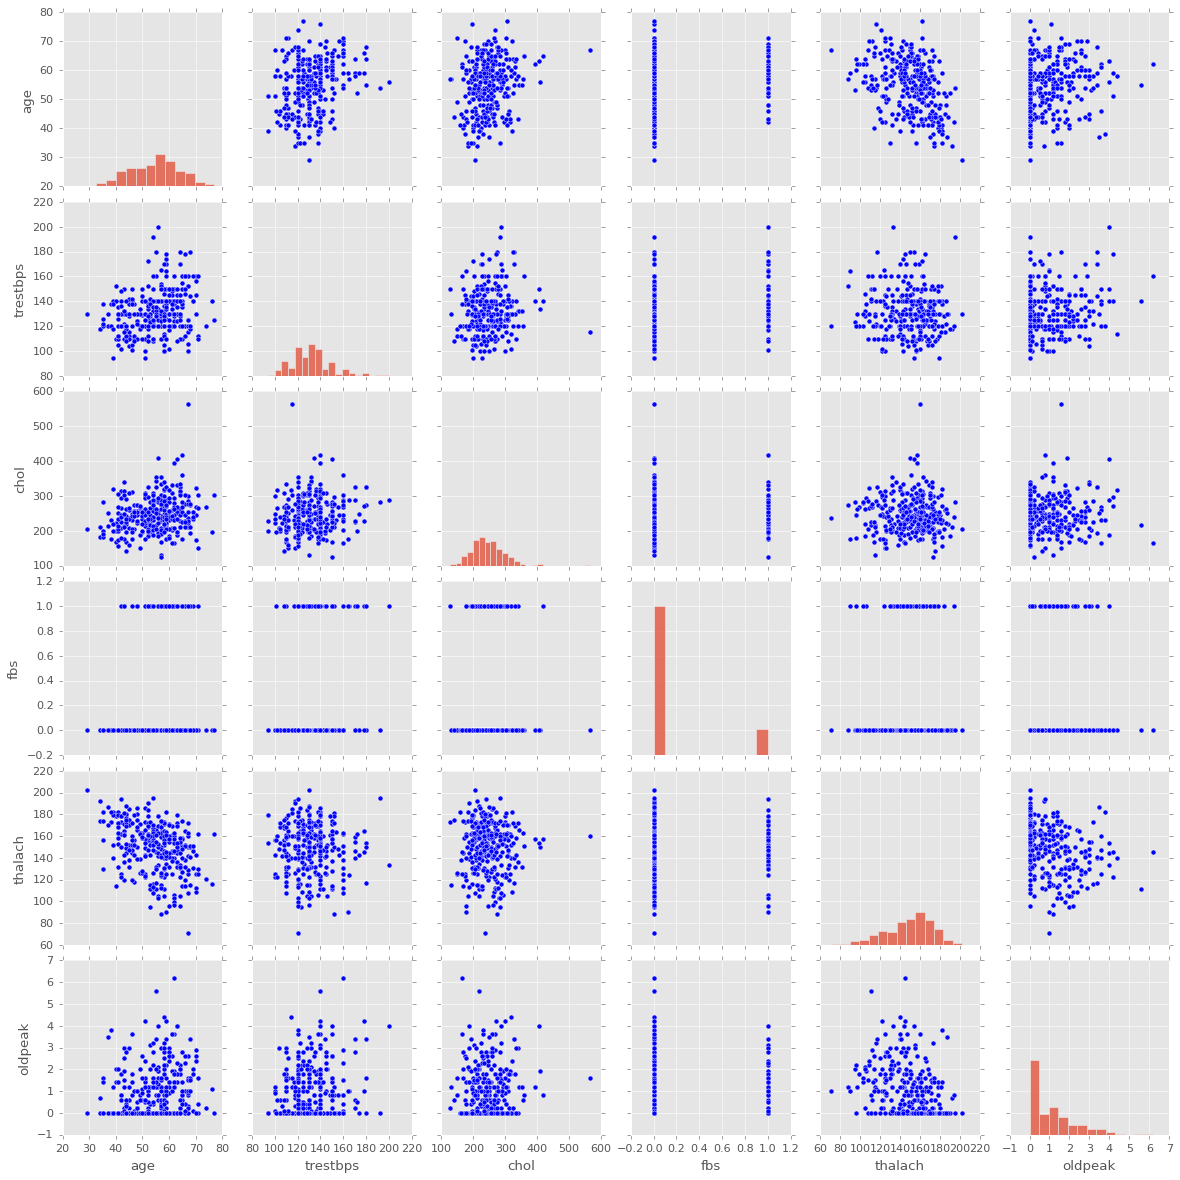

In [477]:
sns.pairplot(data[num])
plt.show()

Evaluate and visualize Pearson's correlation between variables: `Heatmap`

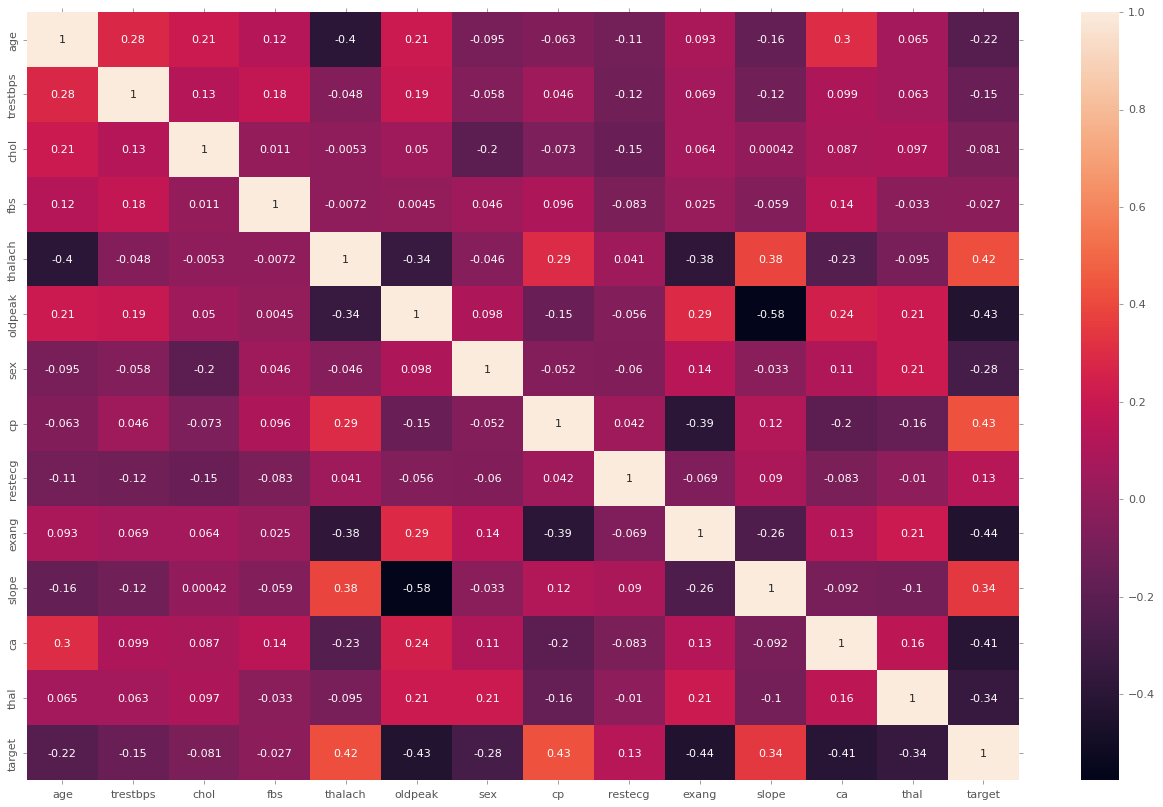

In [478]:
plt.figure(figsize = (20, 12))
sns.heatmap(data[["age", "trestbps", "chol", "fbs", "thalach", "oldpeak", "sex", "cp", "restecg", "exang", "slope", "ca", "thal", "target"]].corr(), annot = True)
plt.show()

**Following high correlations which can be noted from the heatmap:**

1. *target has correlation with:*
    - thal (-)
    - ca (-)
    - slope (+)
    - exang (-)
    - cp (+)
    - oldpeak (-)
    - thalac (+)

2. *slope has correlation with:*
    - oldpeak (-)
    - thalac (+)

3. *exang has correlation with:*
    - cp (-)
    - thalac (-)

4. *cp has correlation with:*
    - thalac (+)

5. *oldpeak has correlation with:*
    - thalac (+)

6. *thalac has correlation with:*
    - age (-)

# Data Preprocessing

In [479]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,2,-0.661712,-0.687083,0,0,-1.511859,0,0.394086,1,0,2,1
733,-1.153610,0,2,-1.346085,-2.041893,0,1,1.112172,0,-0.382092,1,0,2,1
739,-0.267966,1,0,-0.205463,0.164513,0,1,0.499898,1,-0.899544,2,1,3,0
843,0.506972,1,3,1.619532,0.512893,0,0,-1.074521,0,-0.899544,2,0,2,0


# Model Performance Evaluator

In [480]:
class ClassificationModelEvaluator:
    def __init__(self, X, y, test_size=0.3, *args, **kwargs):
        self.X = X
        self.y = y
        self.test_size = test_size
        self.kwargs = kwargs
        self.args = args
        self.fitted_models = None  # Store the trained models


    def model_name_extractor(self):
        model_name = []
        
        for arg in self.args:
            model_name.append(arg.__class__.__name__)
        for name, _ in self.kwargs.items():
            model_name.append(name)
        
        return model_name


    def trainTestSplit(self):
        from sklearn.model_selection import train_test_split
        return train_test_split(self.X, self.y, test_size=0.3, random_state=9)
    

    def model_train(self):
        if self.fitted_models is None:
            x_train, _, y_train, _ = self.trainTestSplit()
            self.fitted_models = []

            for arg in self.args:
                self.fitted_models.append(arg.fit(x_train, y_train))

            for _, model in self.kwargs.items():
                self.fitted_models.append(model.fit(x_train, y_train))

        return self.fitted_models


    # Use this Method to get a DataFrame with training and testing metrics of algorithms used
    def display_report(self):
        import pandas as pd
        import warnings
        warnings.filterwarnings(action = 'ignore')
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
        
        report = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
        x_train, x_test, y_train, y_test = self.trainTestSplit()
        fitted_models = self.model_train()
        index = self.model_name_extractor()
        
        for name, model in zip(index, fitted_models):
            # Performance for training data
            accuracy_train = accuracy_score(y_train, model.predict(x_train))
            precision_train = precision_score(y_train, model.predict(x_train))
            recall_train = recall_score(y_train, model.predict(x_train))
            f1_train = f1_score(y_train, model.predict(x_train))

            # Performance for testing data
            accuracy_test = accuracy_score(y_test, model.predict(x_test))
            precision_test = precision_score(y_test, model.predict(x_test))
            recall_test = recall_score(y_test, model.predict(x_test))
            f1_test = f1_score(y_test, model.predict(x_test)) 

            # Create a DataFrame with metrics
            train_index = name.title() + " Training Set"
            report.loc[train_index] = [accuracy_train, precision_train, recall_train, f1_train]
            test_index = name.title() + " Testing Set"
            report.loc[test_index] = [accuracy_test, precision_test, recall_test, f1_test]

            # Display the metrics DataFrame
        return report
        

    # Use this Method to get classification report of the algorithms used
    def display_classification_report(self):
        from sklearn.metrics import classification_report
        _, x_test, _, y_test = self.trainTestSplit()
        fitted_models = self.model_train()
        index = self.model_name_extractor()

        for name, model in zip(index, fitted_models):
            print(f"Classification Report for {name}:")
            print(classification_report(y_test, model.predict(x_test)))

    
    # Use this Method for Confusion Matrix of algorithms used
    def show_confusion_matrix(self):
        import seaborn as sns 
        import matplotlib.pyplot as plt

        _, x_test, _, y_test = self.trainTestSplit()
        fitted_models = self.model_train()
        index = self.model_name_extractor()

        for name, model in zip(index, fitted_models):
            from sklearn.metrics import confusion_matrix
            conf_matrix = confusion_matrix(y_test, model.predict(x_test))

            # Generating Heatmap for Confusion Matrix
            plt.figure(figsize=(10, 7))
            plt.title(f"Confusion Matrix for {name}", fontdict={"fontweight": "bold", "color": 'k', "fontsize": 14})
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlOrBr')
            plt.xlabel("Predicted Classes", fontdict={"fontsize": 12})
            plt.ylabel("Actual Classes", fontdict={"fontsize": 12})
            plt.show()


    # Use this method to get ROC curve of algorithms used
    def show_ruc_curve(self):
        import seaborn as sns 
        import matplotlib.pyplot as plt
        from sklearn.metrics import roc_curve, auc

        _, x_test, _, y_test = self.trainTestSplit()
        fitted_models = self.model_train()
        index = self.model_name_extractor()

        for name, model in zip(index, fitted_models):
            fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
            roc_auc = auc(fpr, tpr)

            # Plot for ROC with AUC
            plt.style.use('classic')
            plt.figure(figsize=(10, 7))
            plt.title(f'\n\nReceiver Operating Characteristic Curve for {name}\n')
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.legend(loc="lower right")
            plt.show()


    # Use this method to get cross validation score for the algorithms used
    def display_cross_validation_report(self, n=10):
        import numpy as np
        import pandas as pd
        from sklearn.model_selection import StratifiedKFold, cross_val_score

        print("CROSS VALIDATION USING F1 SCORES\n\n")
        fitted_models = self.model_train()
        index = self.model_name_extractor()
        
        # Create a DataFrame to store scores
        cols = [f"CV{i}" for i in range(1, n+1)]+['CV Mean', 'CV Std Dev']
        report = pd.DataFrame(columns=cols)

        k_fold = StratifiedKFold(n_splits=n, shuffle=True, random_state=7)

        for name, model in zip(index, fitted_models):
            cv_results = cross_val_score(model, self.X, self.y, cv=k_fold, scoring='f1', error_score='raise')
            cv_results = np.append(cv_results, [np.mean(cv_results), np.std(cv_results)])
            report.loc[name] = cv_results

        # Plot the CV-Mean Scores of different algorithms
        plt.style.use("dark_background")
        plt.figure(figsize=[10,7])
        plt.title("Cross-Validation Comparison Chart")
        sns.barplot(report["CV Mean"], palette="cubehelix")
        plt.ylabel("Cross-Validation Mean")
        plt.xticks(rotation=90)
        plt.show()

        return report

# Learning Algorithms

In [481]:
# Classification Algorithms in a list
# models = [
#     LogisticRegression(class_weight='balanced', random_state=42),
#     LinearDiscriminantAnalysis(),
#     DecisionTreeClassifier(random_state=42),
#     GaussianNB(),
#     RandomForestClassifier(),
#     SVC(kernel='linear', probability=True, random_state=42),
#     XGBClassifier(n_estimators = 100, n_jobs = -1, learning_rate = 0.1, max_depth =5, scale_pos_weight = 16, probability=True)
# ]

# Classification Algorithms in a dictionary
models = {
    "LOGISTIC REGRESSION": LogisticRegression(class_weight='balanced', random_state=42),
    "LINEAR DISCRIMINANT ANALYSIS": LinearDiscriminantAnalysis(),
    "DECISION TREE": DecisionTreeClassifier(random_state=42),
    "NAIVE BAYES ALGO": GaussianNB(),
    "RANDOM FOREST": RandomForestClassifier(),
    "SUPPORT VECTOR MACHINE": SVC(kernel='linear', probability=True, random_state=42),
    "XGBoost": XGBClassifier(n_estimators = 100, n_jobs = -1, learning_rate = 0.1, max_depth =5, scale_pos_weight = 16, probability=True)
}

# Comparing Model Performances

`without scaling`

In [482]:
# Get data and define features and target
X_base = base_df.iloc[:,:-1]
y = base_df['target']

# Generate Classification Report
report = ClassificationModelEvaluator(X_base, y, **models)
report.display_report()

,Accuracy,Precision,Recall,F1 Score
Logistic Regression Training Set,0.845188,0.822335,0.887671,0.853755
Logistic Regression Testing Set,0.879870,0.856322,0.925466,0.889552
Linear Discriminant Analysis Training Set,0.824268,0.782506,0.906849,0.840102
Linear Discriminant Analysis Testing Set,0.853896,0.811828,0.937888,0.870317
Decision Tree Training Set,1.000000,1.000000,1.000000,1.000000
Decision Tree Testing Set,0.970779,0.963415,0.981366,0.972308
Naive Bayes Algo Training Set,0.828452,0.800995,0.882192,0.839635
Naive Bayes Algo Testing Set,0.860390,0.831461,0.919255,0.873156
Random Forest Training Set,1.000000,1.000000,1.000000,1.000000
Random Forest Testing Set,0.980519,0.981366,0.981366,0.981366


Classification Report for LOGISTIC REGRESSION:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       147
           1       0.86      0.93      0.89       161

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

Classification Report for LINEAR DISCRIMINANT ANALYSIS:
              precision    recall  f1-score   support

           0       0.92      0.76      0.83       147
           1       0.81      0.94      0.87       161

    accuracy                           0.85       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308

Classification Report for DECISION TREE:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       147
           1       0.96      0.98      0.97       161

    accuracy                          

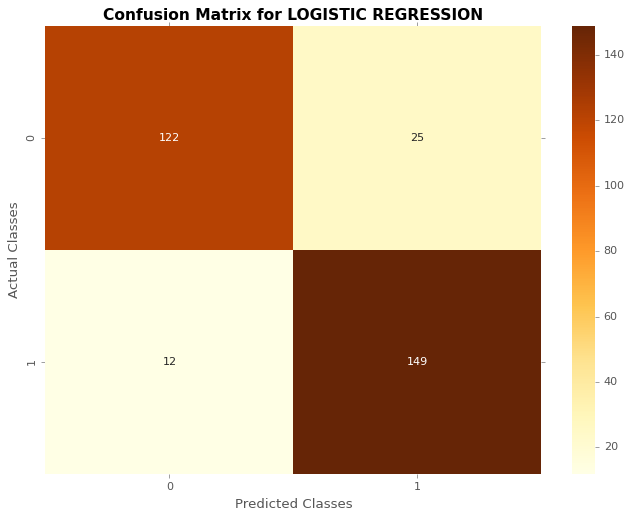

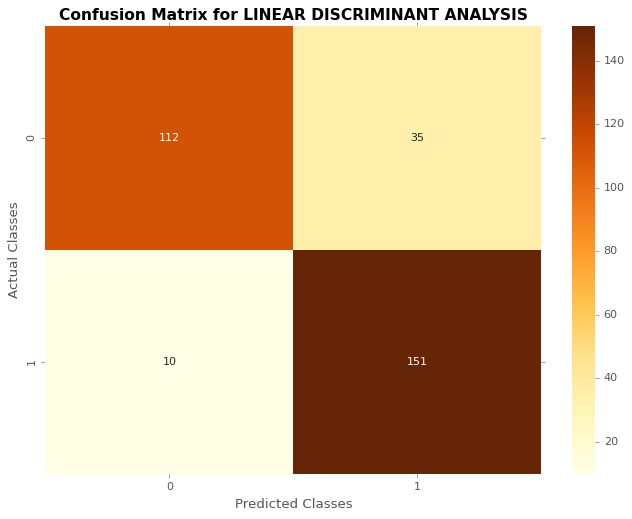

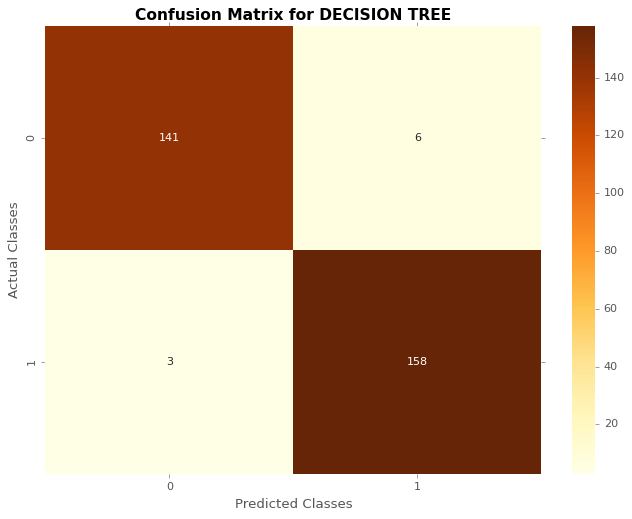

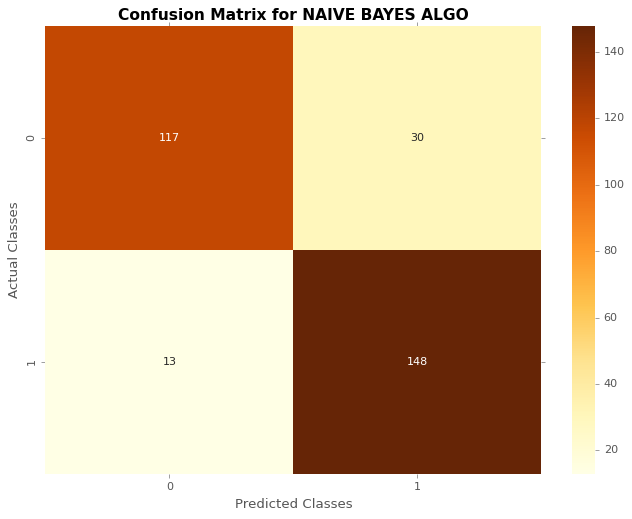

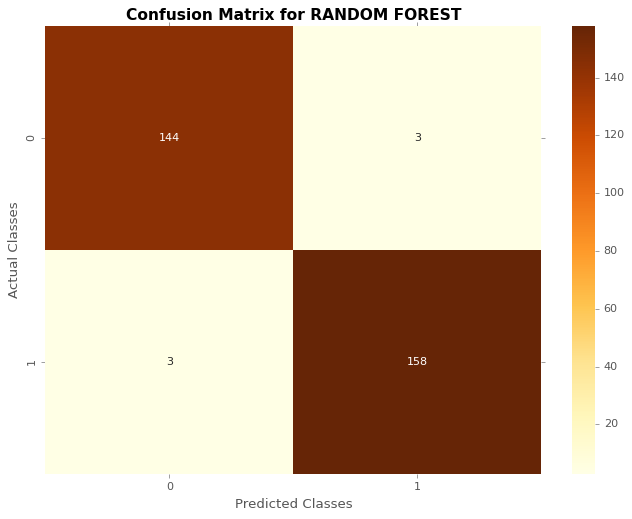

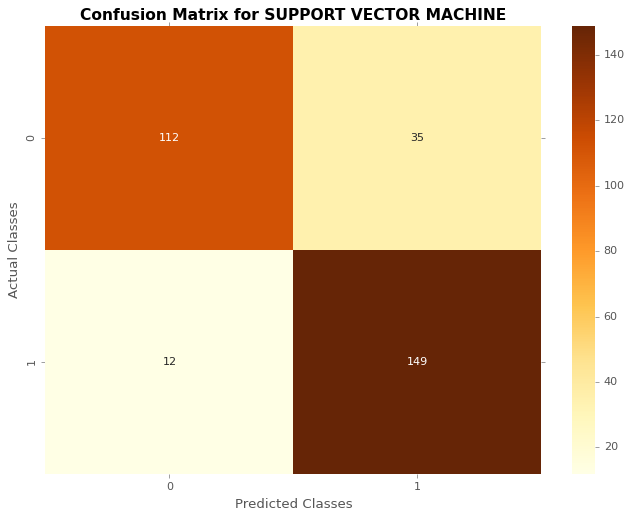

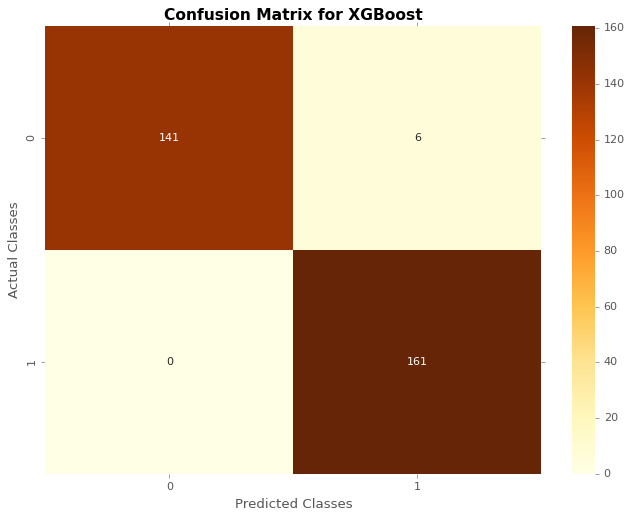

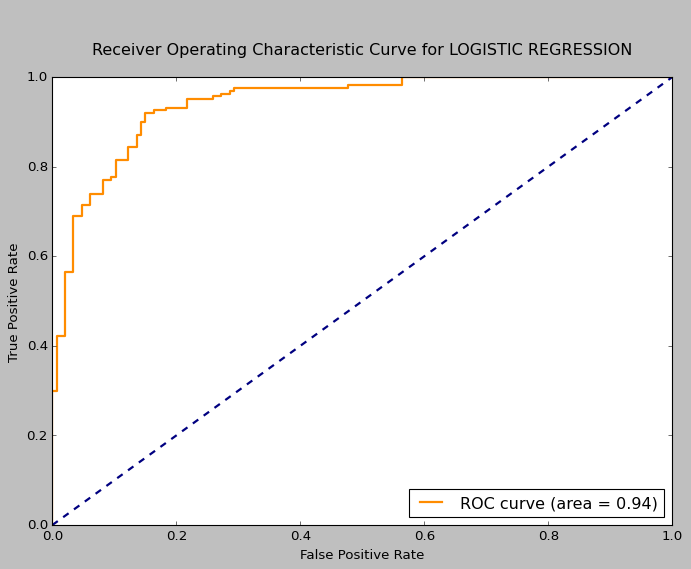

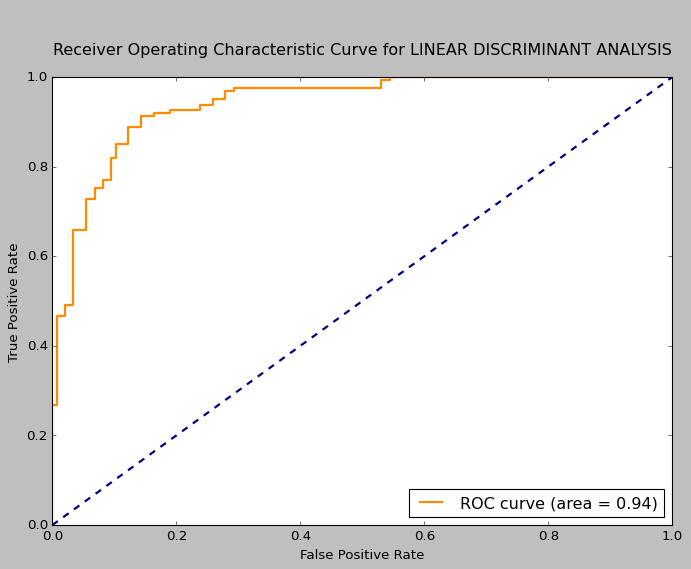

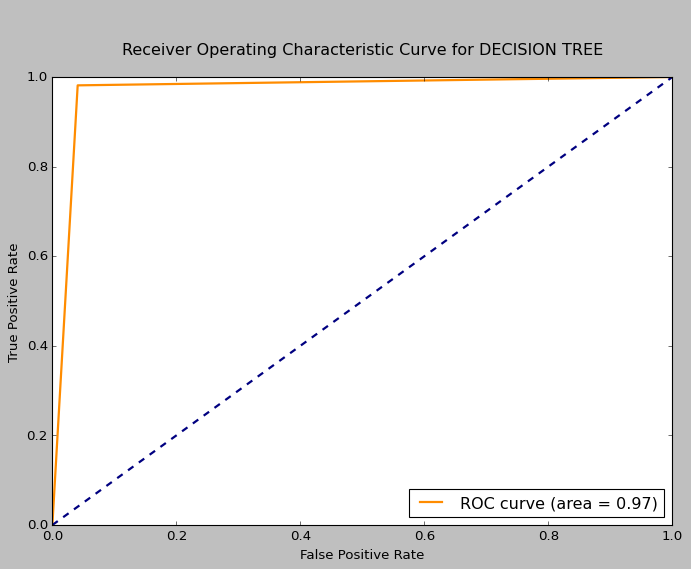

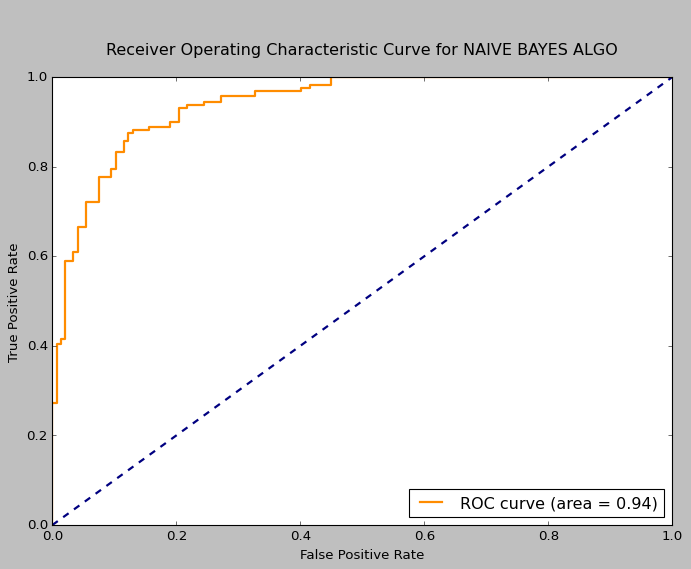

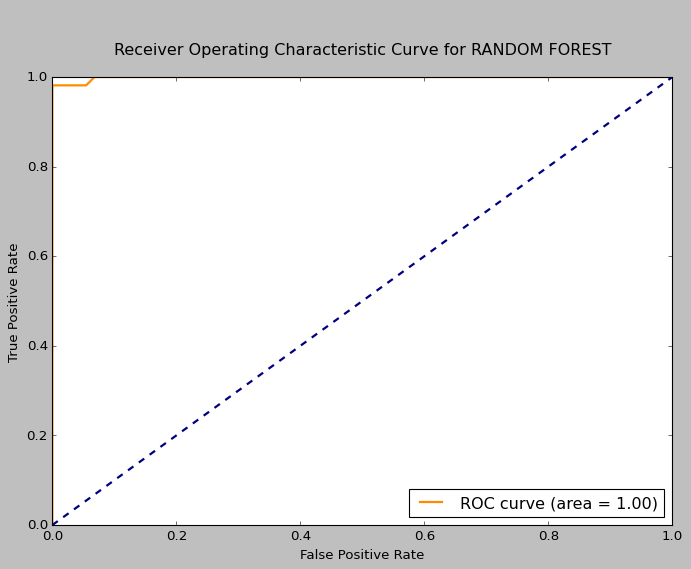

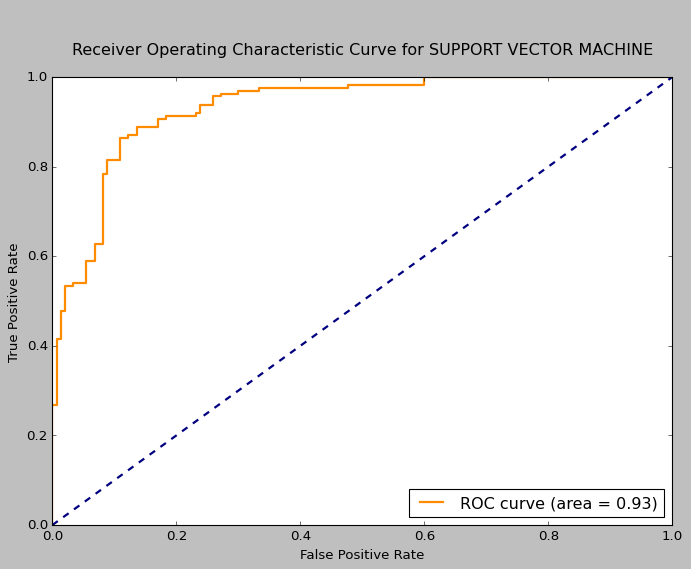

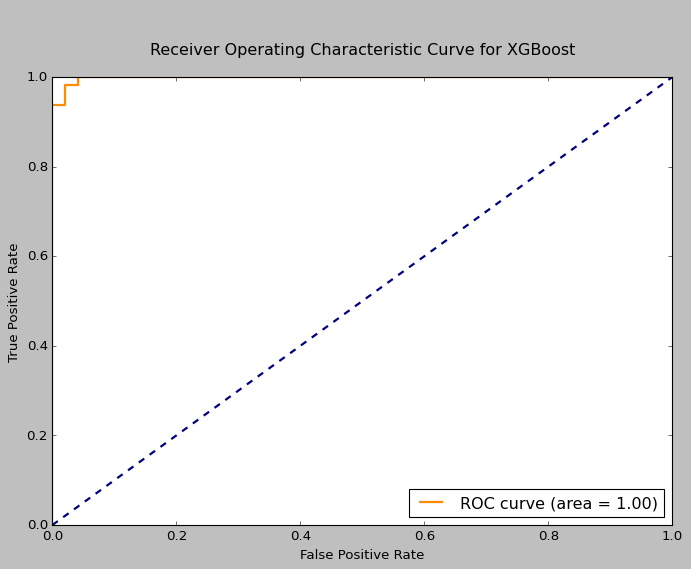

In [483]:
report.display_classification_report()
report.show_confusion_matrix()
report.show_ruc_curve()

**Inference:** We can see top 3 algorithms for this classification task are XG Boost, Random Forest, Decision Tree.

CROSS VALIDATION USING F1 SCORES




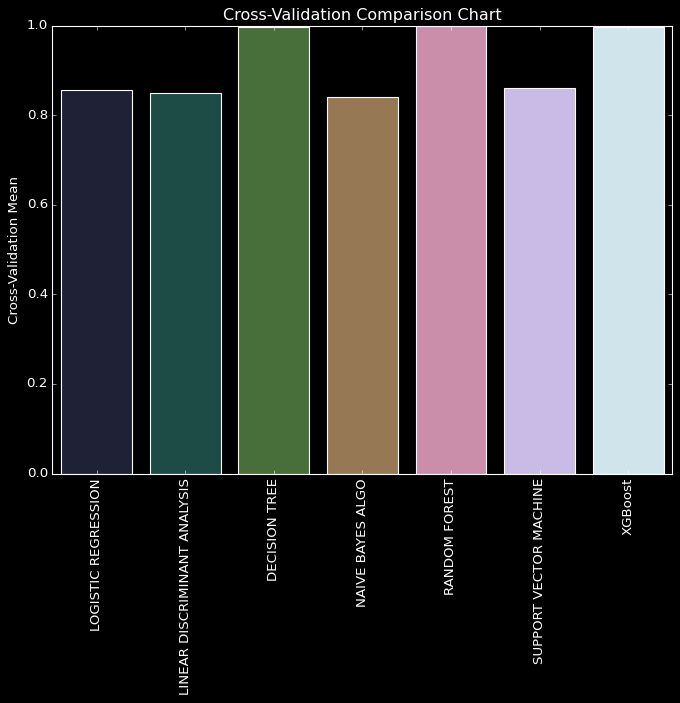

,CV1,CV2,CV3,CV4,CV5,CV6,CV7,CV8,CV9,CV10,CV Mean,CV Std Dev
LOGISTIC REGRESSION,0.831858,0.878505,0.833333,0.902655,0.864865,0.862069,0.873786,0.836364,0.800000,0.872727,0.855616,0.028304
LINEAR DISCRIMINANT ANALYSIS,0.810345,0.872727,0.828829,0.894737,0.859649,0.840336,0.888889,0.836364,0.789916,0.864865,0.848666,0.031995
DECISION TREE,1.000000,0.970874,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.997087,0.008738
NAIVE BAYES ALGO,0.818182,0.818182,0.846154,0.899083,0.830189,0.827586,0.871287,0.831858,0.754386,0.905660,0.840257,0.041733
RANDOM FOREST,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
SUPPORT VECTOR MACHINE,0.834783,0.890909,0.846847,0.904348,0.912281,0.840336,0.878505,0.836364,0.789916,0.872727,0.860701,0.035806
XGBoost,1.000000,1.000000,1.000000,0.981481,1.000000,1.000000,1.000000,1.000000,1.000000,0.981481,0.996296,0.007407


In [484]:
report.display_cross_validation_report()

**Inference:** Reducing the standard deviation in k-fold cross-validation results is often desirable in machine learning model evaluation.From the Cross Validation Report we can see very low standard deviation for different folds. A lower standard deviation indicates that the model's performance is more consistent across different folds, providing a more reliable estimate of its generalization performance.

`standard scaler`

In [485]:
X = data.iloc[:,:-1]
y = data['target']

# Generate Classification Report
report = ClassificationModelEvaluator(X, y, **models)
display(report.display_report())

,Accuracy,Precision,Recall,F1 Score
Logistic Regression Training Set,0.867299,0.862069,0.892857,0.877193
Logistic Regression Testing Set,0.824176,0.860000,0.826923,0.843137
Linear Discriminant Analysis Training Set,0.853081,0.813953,0.937500,0.871369
Linear Discriminant Analysis Testing Set,0.802198,0.826923,0.826923,0.826923
Decision Tree Training Set,1.000000,1.000000,1.000000,1.000000
Decision Tree Testing Set,0.791209,0.836735,0.788462,0.811881
Naive Bayes Algo Training Set,0.853081,0.852174,0.875000,0.863436
Naive Bayes Algo Testing Set,0.791209,0.823529,0.807692,0.815534
Random Forest Training Set,1.000000,1.000000,1.000000,1.000000
Random Forest Testing Set,0.813187,0.857143,0.807692,0.831683


**Inference:** Scaling significantly reduced scores of our previous best classifiers.